In [119]:
import numpy as np
from itertools import accumulate
from matplotlib import pyplot as plt

from icecream import ic

In [120]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [121]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper functions

In [122]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()


def single_mutation(solution: np.ndarray) -> np.ndarray:
    """Tweaks a solution"""
    new_solution = solution.copy()
    i = rng.integers(0, NUM_SETS)
    new_solution[i] = 1-new_solution[i]
    return new_solution

def fitness(solution: np.ndarray):
    return (valid(solution), -cost(solution))

def multiple_mutation(solution: np.ndarray, strength) -> np.ndarray:
    """Tweaks a solution"""
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[rng.integers(0, NUM_SETS)] = True
    new_sol = np.logical_xor(solution, mask)
    return new_sol

## Code

ic| solution_fitness: (np.False_, np.float64(-16906.10945641696))
ic| solution_fitness: (np.False_, np.float64(-21197.163868283442))
ic| solution_fitness: (np.False_, np.float64(-29828.900125750624))
ic| solution_fitness: (np.False_, np.float64(-34235.3923574666))
ic| solution_fitness: (np.False_, np.float64(-38404.249521561345))
ic| solution_fitness: (np.False_, np.float64(-42523.84942630597))
ic| solution_fitness: (np.False_, np.float64(-46711.485220776645))
ic| solution_fitness: (np.False_, np.float64(-51061.40167398123))
ic| solution_fitness: (np.False_, np.float64(-55368.930102720806))
ic| solution_fitness: (np.False_, np.float64(-59697.647826909866))
ic| solution_fitness: (np.False_, np.float64(-63965.17790388625))
ic| solution_fitness: (np.False_, np.float64(-68068.3705818096))
ic| solution_fitness: (np.False_, np.float64(-72274.79266517154))
ic| solution_fitness: (np.False_, np.float64(-76605.86533853157))
ic| solution_fitness: (np.False_, np.float64(-80984.06137319654))
ic| so

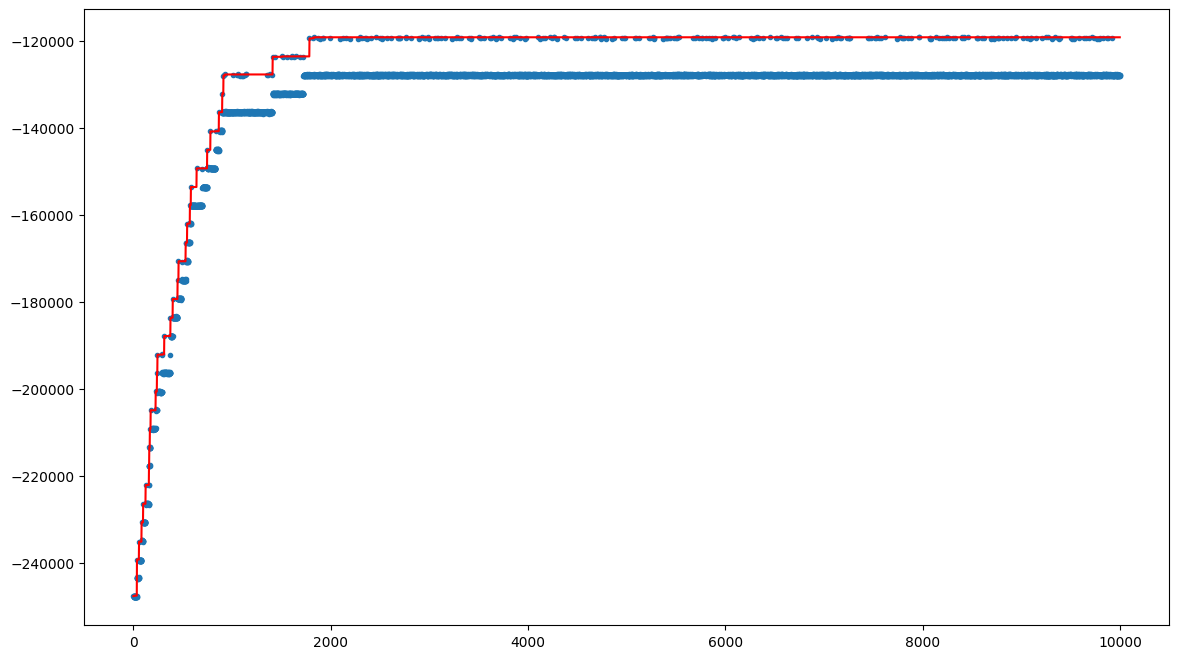

In [123]:
BUFFER_SIZE = 5



solution = rng.random(NUM_SETS) < 0.005
solution_fitness = fitness(solution)
ic(solution_fitness)

while(not valid(solution)):
    solution = multiple_mutation(solution, 0.0001)
    solution_fitness = fitness(solution)
    ic(solution_fitness)


history = []

strength = 0.0001
buffer = list()

for steps in range(10_000):
    #SELF-ADAPTIVE

    new_solution = multiple_mutation(solution, strength)
    f=fitness(new_solution)
    history.append(f[1])
    buffer.append(f > solution_fitness)
    buffer = buffer[-BUFFER_SIZE:]

    # 1 out of 5
    if sum(buffer) > 1:
        strength *= 1.1
    elif sum(buffer) == 0:
        strength /= 1.1
    
    if fitness(new_solution) > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)
        ic(steps, sum(solution), solution_fitness)


ic(fitness(solution))
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")